# CS 2803 Final Project
# Lauren Kearley and Jacob Meyers

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('play_year.csv', index_col=1)

   Season  PassPerSeason  RunPerSeason
0    2009          16976         13740
1    2010          17212         13604
2    2011          17341         13732
3    2012          17749         13544
4    2013          18107         13452
5    2014          17853         13316
6    2015          18323         13085
7    2016          18305         12975
8    2017          17487         13383


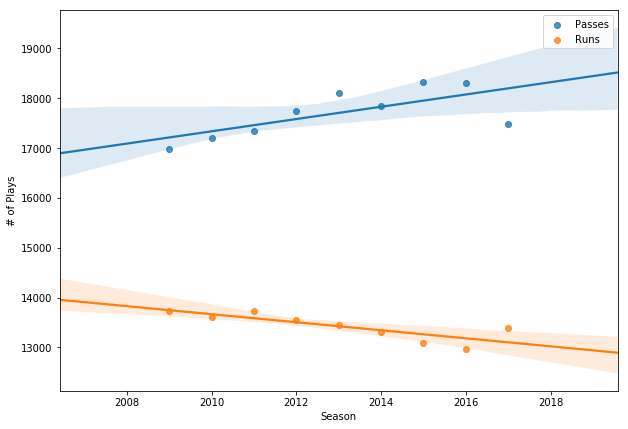

In [111]:
play_per_season = df.groupby(['Season', 'PlayType']).size()
play_per_season = play_per_season.to_frame(name = 'size').reset_index()
pass_season = play_per_season.loc[play_per_season['PlayType'].isin(['Pass'])]
pass_season = pass_season.rename(columns={'size':'PassPerSeason'})
pass_season = pass_season.drop(['PlayType'], axis=1)
pass_season = pass_season.reset_index()
run_season = play_per_season.loc[play_per_season['PlayType'].isin(['Run'])].reset_index()
data = pass_season
data['RunPerSeason'] = run_season[['size']]
data = data.drop(['index'], axis=1)
print(data)
fig, axs = plt.subplots()
sns.regplot(x='Season', y='PassPerSeason', data=data, ax=axs, label="Passes")
sns.regplot(x='Season', y='RunPerSeason', data=data, ax=axs, label="Runs")
axs.legend()
axs.set(xlabel='Season', ylabel='# of Plays')
fig.set_size_inches(10, 7)
plt.show()